# Fake news detection using ML 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

## Read datasets

In [2]:
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

## Data preparation

In [6]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [7]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [8]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [9]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [10]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [121]:
# Check the data
data.head()

,title,text,subject,date,target
0,Trump's 'Paterno' comment sparks jeers on soci...,(Reuters) - Republican presidential front-runn...,politicsNews,"April 14, 2016",true
1,Two human heads found outside broadcaster's of...,MEXICO CITY (Reuters) - Two human heads were d...,worldnews,"November 29, 2017",true
2,Lawmakers say NSA plan to expand sharing data ...,WASHINGTON (Reuters) - A Democratic and a Repu...,politicsNews,"March 23, 2016",true
3,Kasich LOSES IT After Reporter Asks About His...,"No one wants to admit that they re losing, esp...",News,"April 19, 2016",fake
4,Trump says Pence will lead voter fraud panel,"WEST PALM BEACH, Fla. (Reuters) - President Do...",politicsNews,"February 5, 2017",true


In [49]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,BUSTED: Trump’s Secretary Of State Pick Is A ...,It turns out that Rex Tillerson s ties to Russ...,News,fake
1,Myanmar army chief urges internally displaced ...,"SITTWE, Myanmar (Reuters) - Myanmar s army chi...",worldnews,true
2,Macron convinced Trump will see U.S. interests...,NEW YORK (Reuters) - French President Emmanuel...,worldnews,true
3,Vietnam prosecutes former state rubber firm ch...,HANOI (Reuters) - A former chairman of state-r...,worldnews,true
4,Israel approves 176 new settler homes in East ...,JERUSALEM (Reuters) - Israeli authorities appr...,worldnews,true


## Data Statistics

In [52]:
# print out stats about data 

# replace empty strings with nan type
# df["title"].replace(" ", np.nan, inplace=True)
# df["text"].replace(" ", np.nan, inplace=True)

missing_values_count = data.isnull().sum() # we get the number of missing data points per column
print("Number of missing data points per column:\n")
print (missing_values_count)

data.dropna(inplace=True) #drop the empty rows

Number of missing data points per column:

title           0
text            0
subject         0
target          0
is_duplicate    0
dtype: int64


## Exploring dataset for checking unbalanced data

<AxesSubplot:xlabel='target', ylabel='count'>

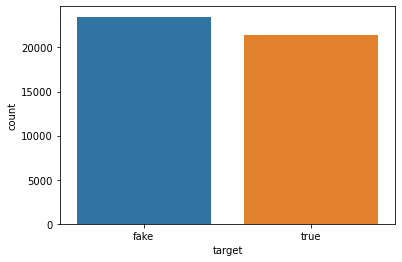

In [58]:
#Looking at a count to see if the data is unbalanced

sns.countplot(data=data, x='target')

#Data is pretty well balanced

In [ ]:
# visualize the distribution of class labels over the entire dataset
# counts for all classes
counts = data["target"].value_counts()

class_labels = ["fake", "true"]

counts_per_class = [counts[0], counts[1]]

# counts.plot(kind='barh')

plt.figure(figsize = (10,10))
plt.pie(counts_per_class, labels = class_labels, autopct = '%1.1f%%')
plt.show()

In [62]:
data['target'].value_counts()

fake    23481
true    21417
Name: target, dtype: int64

In [65]:
data['subject'].unique()
data['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

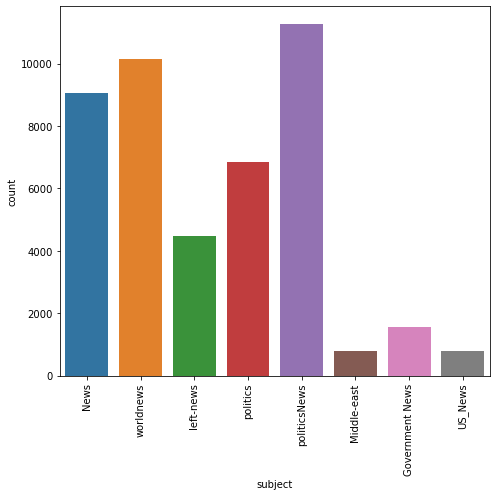

In [70]:
import seaborn as sns
plt.figure(figsize = (7,7))
sns.countplot(x = 'subject', data = data)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

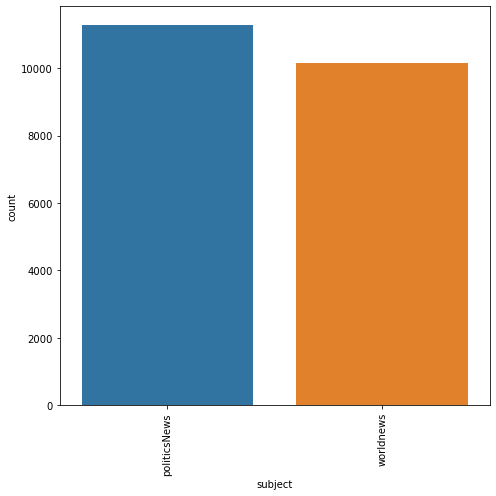

In [72]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'subject', data = true)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

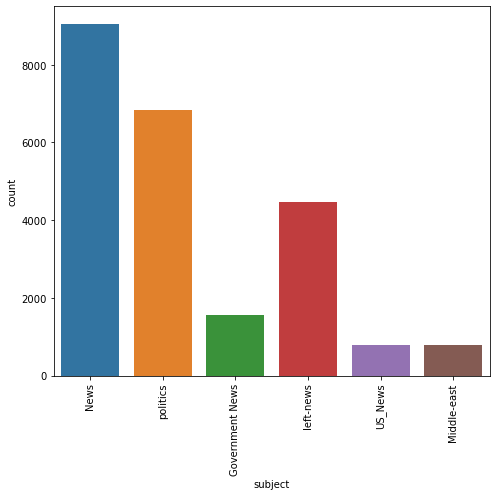

In [110]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'subject', data = fake)
plt.xticks(plt.xticks()[0], rotation = 90)
plt.tight_layout()

In [10]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Does anyone else get the sense Hillary is not ...,left-news,fake
1,LONDON (Reuters) - The most senior U.S. diplom...,politicsNews,true
2,Speaking at the National Council of La Raza co...,News,fake
3,The FBI had just announced that it was clearin...,News,fake
4,WASHINGTON (Reuters) - The White House said on...,politicsNews,true


## Data pre-processing

In [11]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,does anyone else get the sense hillary is not ...,left-news,fake
1,london (reuters) - the most senior u.s. diplom...,politicsNews,true
2,speaking at the national council of la raza co...,News,fake
3,the fbi had just announced that it was clearin...,News,fake
4,washington (reuters) - the white house said on...,politicsNews,true


In [12]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
# Check
data.head()

,text,subject,target
0,does anyone else get the sense hillary is not ...,left-news,fake
1,london reuters the most senior us diplomat in...,politicsNews,true
2,speaking at the national council of la raza co...,News,fake
3,the fbi had just announced that it was clearin...,News,fake
4,washington reuters the white house said on tu...,politicsNews,true


In [14]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Amna
[nltk_data]     Sarwar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
data.head()

,text,subject,target
0,anyone else get sense hillary quite popular am...,left-news,fake
1,london reuters senior us diplomat britain cond...,politicsNews,true
2,speaking national council la raza conference o...,News,fake
3,fbi announced clearing democratic nominee hill...,News,fake
4,washington reuters white house said tuesday “s...,politicsNews,true


## Basic data exploration

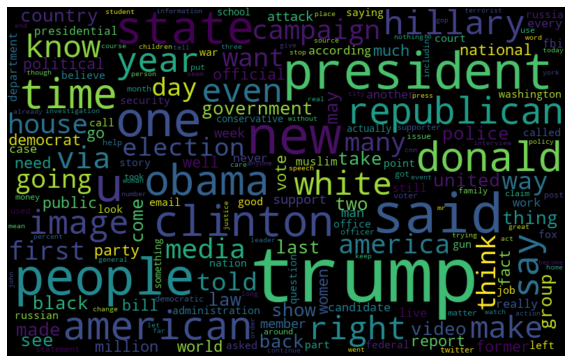

In [18]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

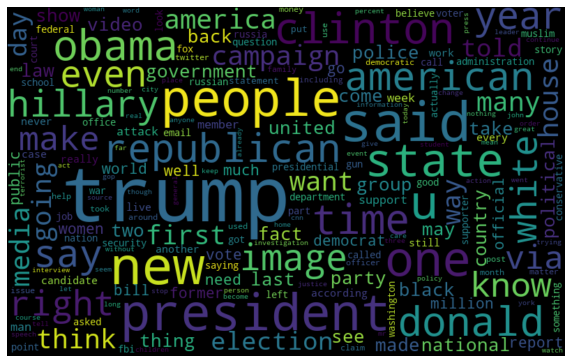

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
# Most frequent words counter 
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'green')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

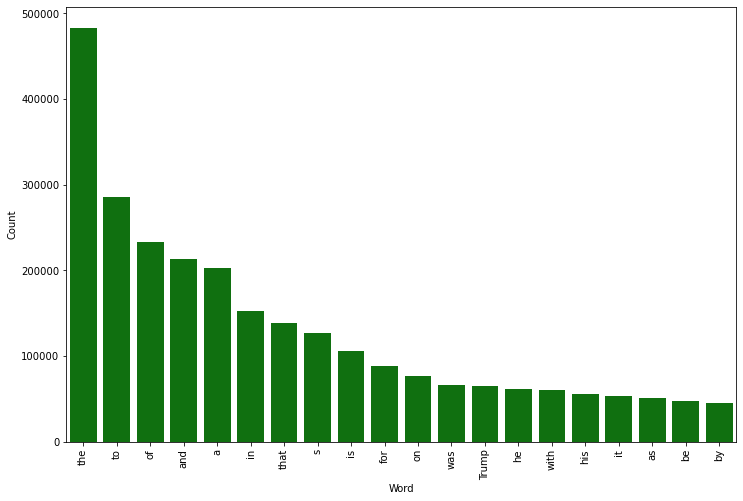

In [86]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

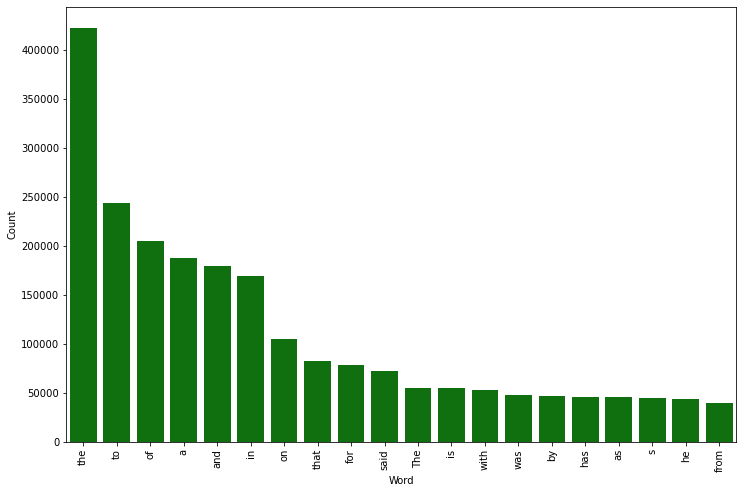

In [87]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [88]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [90]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# **Naive Bayes**




In [91]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.94%


Confusion matrix, without normalization


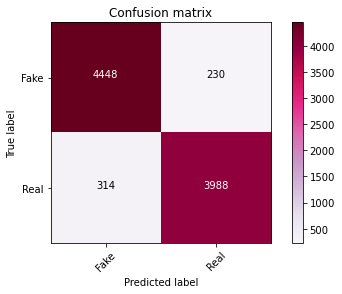

In [94]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'], cmap='PuRd')

# **Logistic regression**

In [95]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.79%


Confusion matrix, without normalization


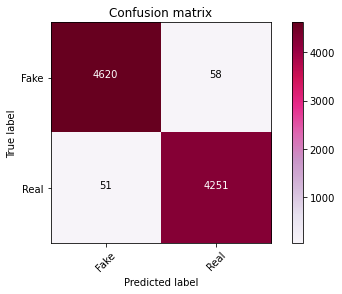

In [97]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'],cmap='PuRd')

# **Decision Tree**

In [98]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.61%


Confusion matrix, without normalization


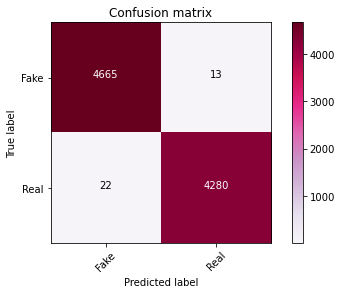

In [99]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'],cmap='PuRd')

# **Random Forest**

In [100]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.69%


Confusion matrix, without normalization


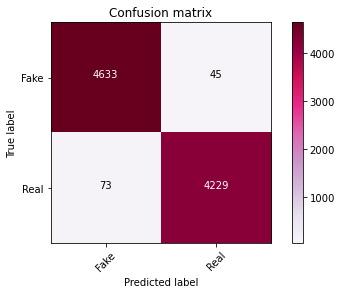

In [101]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'],cmap='PuRd')

## **SVM**

In [102]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)



accuracy: 99.45%


Confusion matrix, without normalization


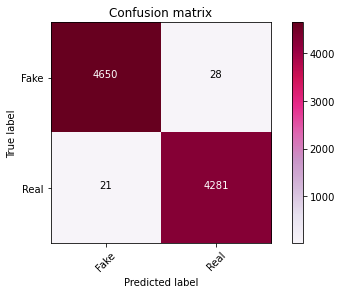

In [103]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'],cmap='PuRd')

# **Comparing** **Different Models**

([<matplotlib.axis.YTick at 0x1d394e638b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

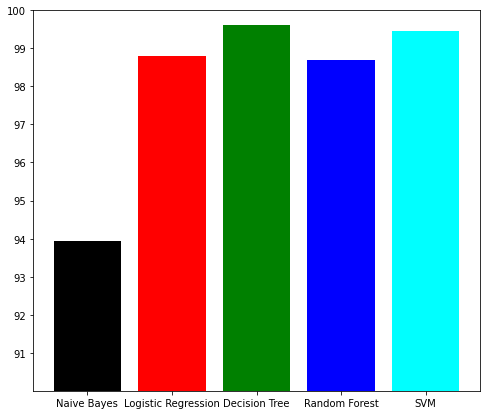

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()),color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))